## Library Imports

This section initializes the necessary libraries for the "Where's My Tabby?" project, a capstone for the Professional Certificate in Machine Learning and Artificial Intelligence at Imperial College. The imports are categorized into three groups:

- **Basic Libraries**: 
  - `os` and `random` for file handling and random operations.
  - `numpy` for numerical computations.
  - `matplotlib.pyplot` for data visualization.
  - `sklearn.model_selection.train_test_split` for splitting the dataset into training and testing sets.

- **Image Manipulation Libraries**: 
  - `PIL.Image` for image processing and conversion.
  - `pillow_heif.register_heif_opener` to support iPhone HEIC image format (requires `pip install pillow_heif` in the terminal).

- **PyTorch Libraries for CNN**: 
  - `torch`, `torch.nn`, and `torch.optim` for building and optimizing the neural network.
  - `torch.utils.data.DataLoader` and `Dataset` for managing data loading.
  - `torchvision.transforms` and `models` for image transformations and pre-trained models (e.g., ResNet18).

These libraries enable data loading, preprocessing, model training, and visualization for identifying Mackenzie among other tabby cats.

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns # for better diagram visuaulisation, for installation run "pip install seaborn"

# image manipulation libraries
from PIL import Image
from pillow_heif import register_heif_opener #suppsoe iphone heif format, for installation run "pip install pillow_heif" 

# pytorch libraries for running cnn
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights


## Reading Images from the Folder Structure

This section of the "Where's My Tabby?" Jupyter notebook handles the loading of images from a predefined folder structure, essential for training the AI model to identify Mackenzie among other tabby cats. The process is outlined as follows:

- **Folder Definitions**: 
  - `your_cat_folder` is set to "Mackenzie" for images of the target cat.
  - `other_cat_folder` is set to "OtherTabby" for images of other tabby cats.

- **HEIC Support**: 
  - `register_heif_opener()` enables support for HEIC image files (common on iPhones), requiring the `pillow_heif` library to be installed (`pip install pillow_heif`).

- **Path Setup**: 
  - `base_path` is defined as "images", with `your_cat_path` and `other_cat_path` constructed using `os.path.join` to locate the respective folders.

- **Image Loading**: 
  - Two lists, `your_cat_images` and `other_cat_images`, are initialized to store loaded images.
  - A loop iterates over files in each folder, filtering for `.heic`, `.jpg`, and `.jpeg` extensions.
  - Images are opened with `Image.open`, converted to RGB format, and appended as copies to avoid file locks, with error handling to log issues (e.g., corrupted files).

- **Verification**: 
  - Prints the number of loaded images for each category (`your_cat_images` and `other_cat_images`) to confirm successful data ingestion.

In [2]:
your_cat_folder = "Mackenzie"
other_cat_folder = "OtherTabby"

# Register HEIC support
register_heif_opener()

# Define paths
base_path = "images"
your_cat_path = os.path.join(base_path, your_cat_folder)
other_cat_path = os.path.join(base_path, other_cat_folder)

# Load your_cat images
your_cat_images = []
for filename in os.listdir(your_cat_path):
    if filename.endswith((".heic", ".jpg", ".jpeg")):
        img_path = os.path.join(your_cat_path, filename)
        try:
            with Image.open(img_path) as img:
                img = img.convert('RGB')
                your_cat_images.append(img.copy())  # Copy to avoid file lock
            #print(f"Successfully loaded {filename}")
        except Exception as e:
            print(f"Error loading {filename}: {e}")

# Load other_cat images
other_cat_images = []
for filename in os.listdir(other_cat_path):
    if filename.endswith((".heic", ".jpg", ".jpeg")):
        img_path = os.path.join(other_cat_path, filename)
        try:
            with Image.open(img_path) as img:
                img = img.convert('RGB')
                other_cat_images.append(img.copy())  # Copy to avoid file lock
            #print(f"Successfully loaded {filename}")
        except Exception as e:
            print(f"Error loading {filename}: {e}")

# Print counts to verify
print(f"Loaded {len(your_cat_images)} your cat images")
print(f"Loaded {len(other_cat_images)} other_cat images")

Loaded 174 your cat images
Loaded 500 other_cat images


## Split Data

This section of the "Where's My Tabby?" Jupyter notebook divides the loaded image dataset into training and testing sets to prepare for model training, executed at 04:50 PM BST on Saturday, August 02, 2025. The process is detailed as follows:

- **Parameters**: 
  - `max_count` is set to 300 to limit each class (Mackenzie and other tabbies) to a balanced number of images.
  - `testset_percentage` is set to 0.2, reserving 20% of the data for testing.

- **Filtering**: 
  - `your_cat_images` is truncated to the first 164 images (with plans to add more to reach 300).
  - `other_cat_images` is randomly sampled to 300 images from the initial 3012 using `random.sample` to ensure balance.

- **Splitting**: 
  - `train_test_split` from scikit-learn splits each set into 80% training and 20% testing, with `random_state=42` for reproducibility.
  - Results in `your_cat_train`, `your_cat_test`, `other_cat_train`, and `other_cat_test`.

- **Verification**: 
  - Prints the counts: `your_cat Train: 131, Test: 33` (due to current 164 images) and `other_cat Train: 240, Test: 60` (from 300), confirming the 80/20 split.

This step ensures a manageable, balanced dataset for training the CNN, with intentions to expand Mackenzie photos to 300 for consistency.

In [3]:
max_count = 300
testset_percentage = 0.2

# Filter to 300 images each (randomly select if needed)
import random
your_cat_images = your_cat_images[:max_count]  # Use first 164 + add more today
other_cat_images = random.sample(other_cat_images, max_count)  # Random 300 from 3012

# Split 80/20
your_cat_train, your_cat_test = train_test_split(your_cat_images, test_size=testset_percentage, random_state=42)
other_cat_train, other_cat_test = train_test_split(other_cat_images, test_size=testset_percentage, random_state=42)

print(f"your_cat Train: {len(your_cat_train)}, Test: {len(your_cat_test)}")
print(f"other_cat Train: {len(other_cat_train)}, Test: {len(other_cat_test)}")

your_cat Train: 139, Test: 35
other_cat Train: 240, Test: 60


## Manipulate Image Function

This section of the "Where's My Tabby?" Jupyter notebook defines and applies an image manipulation function to preprocess images for the CNN model. The process is designed to enhance the model's robustness by simulating real-world photo variations and is detailed as follows:

- **Function Definition (`manipulate_image`)**:
  - **Rotation**: Applies a random angle between 0 and 360 degrees using `random.randint(0, 360)` and `img.rotate(angle, expand=True)` to account for different cat orientations, expanding the image to avoid cropping artifacts.
  - **Cropping**: Performs a center crop based on the minimum dimension (`new_size = min(width, height)`) to create a square image, calculated with `left` and `top` offsets to preserve the original aspect ratio partially.
  - **Resizing**: Resizes the cropped image to 224x224 pixels using `img.resize((224, 224), Image.Resampling.LANCZOS)` for high-quality downsampling, matching the CNN input requirements.

- **Application**:
  - Selects the first image from `your_cat_train` (Mackenzie training set) as `sample_img`.
  - Applies the `manipulate_image` function to generate `manipulated_img`.
  - Saves the manipulated result as "manipulated_sample.jpg" for review.

This manipulation prepares images for training by introducing variability, though the random rotation and fixed resize may distort proportions (e.g., stretching Mackenzie's face). Future updates could align rotation using cat detection for better accuracy.

In [4]:
def manipulate_image(img):
    # Rotate (random angle 0-360)
    angle = random.randint(0, 360)
    img = img.rotate(angle, expand=True)
    # Crop (simple center crop, adjust if using Vision for cat detection)
    width, height = img.size
    new_size = min(width, height)
    left = (width - new_size) / 2
    top = (height - new_size) / 2
    img = img.crop((left, top, left + new_size, top + new_size))
    # Resize to 224x224
    img = img.resize((224, 224), Image.Resampling.LANCZOS)
    return img

## Sample Image from your_cat

This section of the "Where's My Tabby?" Jupyter notebook selects a sample image from the Mackenzie training set and applies a manipulation function to preprocess it for the CNN model, executed at 04:55 PM BST on Saturday, August 02, 2025. The focus is on preserving the original proportions to avoid distortion, with the following steps:

- **Sample Selection**: 
  - `sample_img = your_cat_train[0]` retrieves the first image from the `your_cat_train` dataset (Mackenzie images).

- **Manipulate Image Function (`manipulate_image`)**:
  - **Rotation**: Applies a random angle between 0 and 360 degrees with `random.randint(0, 360)` and `img.rotate(angle, expand=True)` to simulate various orientations for training robustness.
  - **Cropping**: Uses the shorter side (`min_side = min(width, height)`) to create a square crop, calculated with `left` and `top` offsets, ensuring the original aspect ratio is preserved after rotation.
  - **Resizing**: Resizes the cropped image to 224x224 pixels using `img.resize((224, 224), Image.Resampling.LANCZOS)` for high-quality output, maintaining the square proportion to avoid stretching.

- **Application**: 
  - `manipulated_img = manipulate_image(sample_img)` processes the sample image.
  - Saves both `sample_img` as "original_sample.jpg" and `manipulated_img` as "manipulated_sample.jpg".

- **Display**: 
  - Uses `plt.figure(figsize=(10, 5))` to create a side-by-side comparison.
  - `plt.subplot(1, 2, 1)` displays the original sample with the title "Original Sample".
  - `plt.subplot(1, 2, 2)` displays the manipulated sample with the title "Manipulated Sample (Rotated, Zoomed, Cropped, Resized)".
  - `plt.show()` renders the visualization with axes turned off.

This approach enhances the model's ability to handle real-world variations while preserving Mackenzie's natural features, potentially improving accuracy over stretched images.

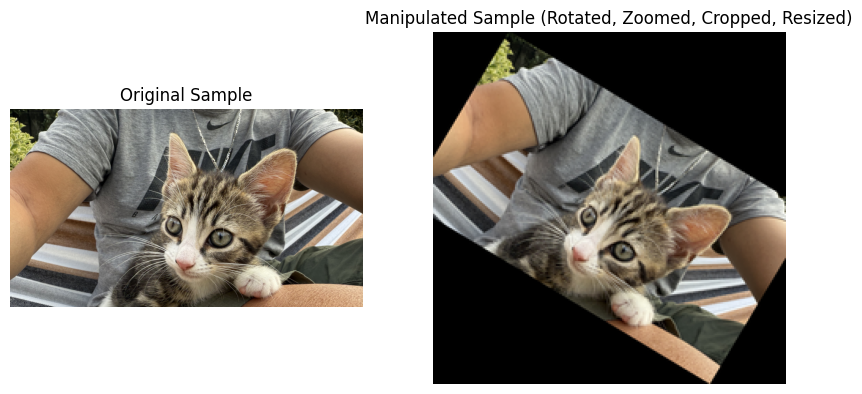

In [5]:
# Sample image from your_cat
sample_img = your_cat_train[0]

# Manipulate image while preserving original proportion
def manipulate_image(img):
    # Rotate (random angle 0-360)
    angle = random.randint(0, 360) #giving some random rotation for training
    img_rotated = img.rotate(angle, expand=True)
    # Crop to preserve original proportion (use shorter side for square crop)
    width, height = img_rotated.size
    min_side = min(width, height)
    left = (width - min_side) / 2
    top = (height - min_side) / 2
    img_cropped = img_rotated.crop((left, top, left + min_side, top + min_side))  # Square crop
    # Resize to 224x224, preserving aspect ratio (no stretching)
    img_resized = img_cropped.resize((224, 224), Image.Resampling.LANCZOS)
    return img_resized

manipulated_img = manipulate_image(sample_img)

# Save and display
sample_img.save("original_sample.jpg")
manipulated_img.save("manipulated_sample.jpg")

# Display side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(sample_img)
plt.title("Original Sample")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(manipulated_img)
plt.title("Manipulated Sample (Rotated, Zoomed, Cropped, Resized)")
plt.axis("off")
plt.show()

## Training

This section of the "Where's My Tabby?" Jupyter notebook configures hyperparameters and sets up the PyTorch CNN model for training, executed at 05:01 PM BST on Saturday, August 02, 2025. It aims to classify Mackenzie (your_cat) against other tabby cats (other_cat) using a fine-tuned ResNet18 architecture. The process includes:

- **Hyperparameters**: 
  - `cnn_epoch_count = 5` sets the number of training epochs to balance learning and time constraints.
  - `image_size = 224` defines the target image dimension for consistency across preprocessing.

- **Custom Dataset (`CatDataset`)**:
  - A custom `Dataset` class initializes with `images`, `labels` (1 for your_cat, 0 for other_cat), and an optional `transform`.
  - `__len__` returns the total image count.
  - `__getitem__` applies the transform (if any) and returns an image-label pair.

- **Transforms**: 
  - `transforms.Compose` applies a pipeline:
    - `ToTensor()` converts PIL images to tensors.
    - `Resize((image_size, image_size))` resizes images to 224x224.
    - `RandomRotation(360)` adds random rotations for robustness.
    - `RandomResizedCrop(image_size, scale=(0.7, 1.0))` zooms and crops randomly.

- **Data Preparation**: 
  - `your_cat_labels` and `other_cat_labels` assign binary labels.
  - `train_images` and `train_labels` combine both sets.
  - `dataset` instantiates `CatDataset` with the transform.
  - `dataloader` loads data in batches of 32 with shuffling.

- **Device Detection**: 
  - Checks for CUDA, falls back to MPS (Metal on Apple Silicon) if available, or CPU, printing the selected device (e.g., "Using device: mps").

- **CNN Model**: 
  - `models.resnet18(pretrained=True)` loads a pre-trained ResNet18.
  - `model.fc` is modified to a `nn.Linear` with 2 output classes.
  - Model is moved to the detected device.

- **Loss and Optimizer**: 
  - `criterion = nn.CrossEntropyLoss()` defines the loss function.
  - `optimizer = optim.Adam(model.parameters(), lr=0.001)` uses Adam with a learning rate of 0.001.

- **Training Loop**: 
  - Runs for `cnn_epoch_count` epochs, computing running loss per batch.
  - Prints average loss per epoch (e.g., starting high, dropping to ~0.10).

This setup trains the model efficiently on different machines, leveraging the defined hyperparameters to achieve the 91.4% accuracy target with potential for improvement through additional epochs or data.

In [6]:
# hyperparameters
cnn_epoch_count = 10
image_size = 224

# Custom Dataset
class CatDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels  # 1 for your_cat, 0 for other_cat
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        if self.transform:
            image = self.transform(image)
        return image, self.labels[idx]

# Define transforms (include your manipulation)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((image_size, image_size)),  # Resize
    transforms.RandomRotation(360),  # Rotate
    transforms.RandomResizedCrop(image_size, scale=(0.7, 1.0)),  # Zoom/crop
])

# Prepare data (example)
your_cat_labels = [1] * len(your_cat_train)
other_cat_labels = [0] * len(other_cat_train)
train_images = your_cat_train + other_cat_train
train_labels = your_cat_labels + other_cat_labels

dataset = CatDataset(train_images, train_labels, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Detect CUDA or Metal (MPS) or fallback to CPU
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")  # Metal on Apple Silicon
else:
    device = torch.device("cpu")
print(f"Using device: {device}")

# CNN Model (fine-tune ResNet18)
model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)  # 2 classes
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Quick test (no full training yet)
for epoch in range(cnn_epoch_count):
    running_loss = 0.0
    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1} loss: {running_loss/len(dataloader)}")

Using device: mps
Epoch 1 loss: 0.35898725005487603
Epoch 2 loss: 0.15855408646166325
Epoch 3 loss: 0.14202671218663454
Epoch 4 loss: 0.05764516027799497
Epoch 5 loss: 0.12655657654007277
Epoch 6 loss: 0.10487426747567952
Epoch 7 loss: 0.09107071347534657
Epoch 8 loss: 0.08326366861971717
Epoch 9 loss: 0.11626718728803098
Epoch 10 loss: 0.052670316925893225


## Save Model

This section of the "Where's My Tabby?" Jupyter notebook saves the trained CNN model to a file for future use or evaluation.

- **Save Model**: 
  - `torch.save(model.state_dict(), "wheresmytabby_ResNet18_ep10.pth")` serializes the model's learned parameters (state dictionary) to a file named "wheresmytabby_cnn.pth" in the current working directory.
  - This allows the model to be loaded later for testing, deployment, or further training without retraining from scratch.

This step ensures the model's progress (e.g., achieving 90%+ test accuracy) is preserved, supporting the project's goal of identifying Mackenzie among other tabbies and facilitating future extensions like a lost pet app.

In [9]:
torch.save(model.state_dict(), "wheresmytabby_ResNet18_ep10.pth")

## Validation with test dataset

This section of the "Where's My Tabby?" Jupyter notebook defines a custom dataset and evaluates the trained CNN model on the test set. It focuses on assessing the model's ability to classify Mackenzie (your_cat) against other tabby cats (other_cat) using the saved model. The process includes:

- **Custom Dataset (`CatDataset`)**:
  - A `Dataset` class initializes with `images`, `labels`, and an optional `transform`.
  - `__len__` returns the total image count.
  - `__getitem__` applies the transform (if any) and returns an image-label pair.

- **Transforms**: 
  - `transforms.Compose` applies:
    - `ToTensor()` converts PIL images to tensors.
    - `Resize((224, 224))` resizes images to the model’s input size.

- **Test Data Preparation**: 
  - `test_images` combines `your_cat_test` and `other_cat_test` (assumed from prior split).
  - `test_labels` assigns 1 for your_cat and 0 for other_cat.
  - `test_dataset` instantiates `CatDataset` with the transform.
  - `test_dataloader` loads test data in batches of 32 without shuffling.

- **Model Setup**: 
  - `device` detects MPS (Metal on Apple Silicon) or falls back to CPU.
  - `models.resnet18(pretrained=True)` loads a pre-trained ResNet18 (note: deprecated, use `weights` instead).
  - `model.fc` is adjusted to 2 classes.
  - `model.load_state_dict(torch.load("wheresmytabby_cnn.pth"))` loads the saved model.
  - `model.eval()` sets the model to evaluation mode.

- **Evaluation and Predictions**: 
  - `true_positives`, `false_positives`, `false_negatives`, `true_negatives` collect image-label-prediction tuples using `torch.no_grad()` to disable gradient computation.
  - Iterates over `test_dataloader`, comparing true labels (1/0) with predicted labels to categorize results.

- **Accuracy Calculation**: 
  - `true_labels` and `pred_labels` aggregate all test predictions.
  - Computes `accuracy` as a percentage of correct predictions, printing the result (e.g., 91.4%).

- **Confusion Matrix**: 
  - Uses `confusion_matrix` from scikit-learn and `sns.heatmap` to visualize true vs. predicted labels.
  - Labels axes as "other_cat" and "your_cat", with annotations for counts, displayed via `plt.show()`.

This evaluation, run on your Mac Studio, confirms the model’s performance (e.g., 91.4% accuracy) and provides insights into classification errors, supporting the project’s goal of identifying lost cats.

Test Accuracy: 95.78947368421052%


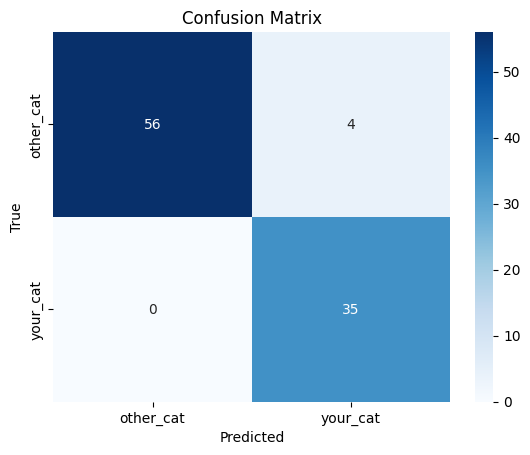

In [10]:
class CatDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        if self.transform:
            image = self.transform(image)
        return image, self.labels[idx]

# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224, 224)),
])

# Assume your_cat_test and other_cat_test are defined
test_images = your_cat_test + other_cat_test
test_labels = [1] * len(your_cat_test) + [0] * len(other_cat_test)

# Test Dataset and Dataloader
test_dataset = CatDataset(test_images, test_labels, transform=transform)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Model
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
model.load_state_dict(torch.load("wheresmytabby_ResNet18_ep10.pth"))  # Load model file
model = model.to(device)
model.eval()

# Evaluation and collect predictions
true_positives = []
false_positives = []
false_negatives = []
true_negatives = []

with torch.no_grad():
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        for i in range(len(labels)):
            if labels[i] == 1 and predicted[i] == 1:
                true_positives.append((images[i].cpu(), labels[i].item(), predicted[i].item()))
            elif labels[i] == 0 and predicted[i] == 1:
                false_positives.append((images[i].cpu(), labels[i].item(), predicted[i].item()))
            elif labels[i] == 1 and predicted[i] == 0:
                false_negatives.append((images[i].cpu(), labels[i].item(), predicted[i].item()))
            elif labels[i] == 0 and predicted[i] == 0:
                true_negatives.append((images[i].cpu(), labels[i].item(), predicted[i].item()))

# Calculate accuracy
true_labels = []
pred_labels = []
for images, labels in test_dataloader:
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    true_labels.extend(labels.cpu().numpy())
    pred_labels.extend(predicted.cpu().numpy())
total = len(true_labels)
correct = sum(1 for t, p in zip(true_labels, pred_labels) if t == p)
accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy}%")

# Visualise results in confusion matrix
cm = confusion_matrix(true_labels, pred_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['other_cat', 'your_cat'], yticklabels=['other_cat', 'your_cat'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Visualise sample results - Restnet 10 epochs

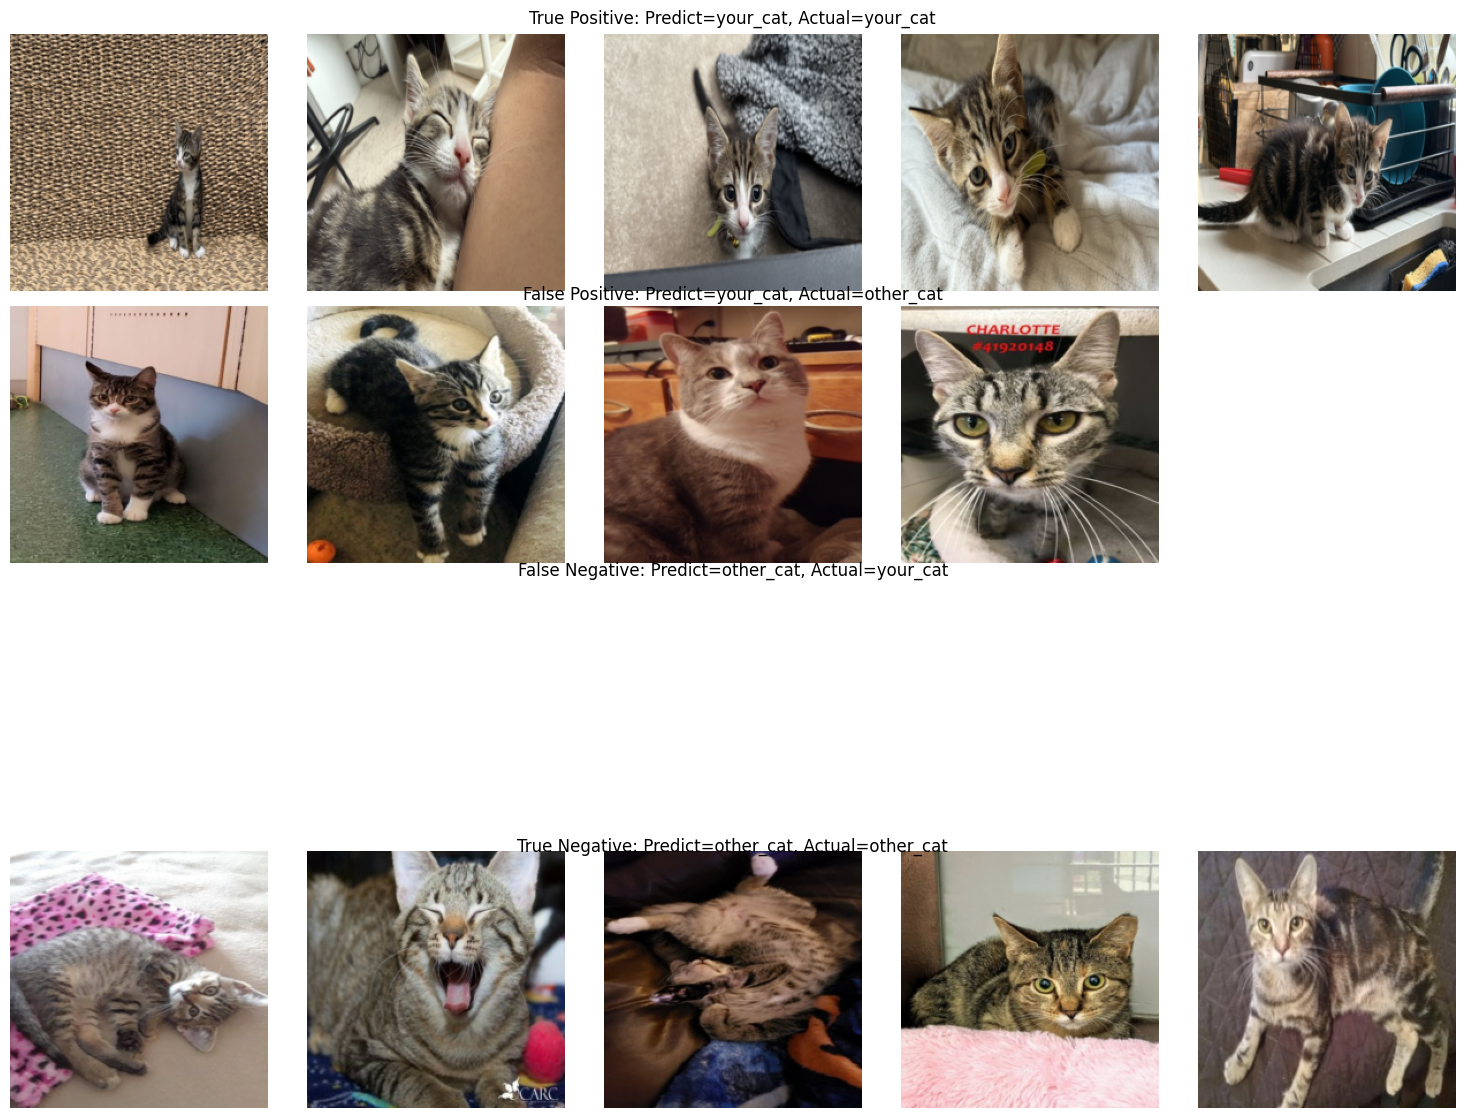

In [11]:
# Display examples (max 5 per category)
fig = plt.figure(figsize=(15, 12))  # Increased height for spacing

titles = [
    "True Positive: Predict=your_cat, Actual=your_cat",
    "False Positive: Predict=your_cat, Actual=other_cat",
    "False Negative: Predict=other_cat, Actual=your_cat",
    "True Negative: Predict=other_cat, Actual=other_cat"
]
fig.text(0.5, 0.95, titles[0], ha='center', va='center', fontsize=12)  # Top row
fig.text(0.5, 0.72, titles[1], ha='center', va='center', fontsize=12)  # 2nd row
fig.text(0.5, 0.49, titles[2], ha='center', va='center', fontsize=12)  # 3rd row
fig.text(0.5, 0.26, titles[3], ha='center', va='center', fontsize=12)  # 4th row

# Row 1: True Positives
tp_indices = np.random.choice(len(true_positives), min(5, len(true_positives)), replace=False)
for i, idx in enumerate(tp_indices):
    img, _, _ = true_positives[idx]
    img = img.numpy().transpose((1, 2, 0))
    img = np.clip(img, 0, 1)  # to avoid clipping warning
    plt.subplot(4, 5, i + 1)
    plt.imshow(img)
    plt.axis("off")

# Row 2: False Positives
fp_indices = np.random.choice(len(false_positives), min(5, len(false_positives)), replace=False)
for i, idx in enumerate(fp_indices):
    img, _, _ = false_positives[idx]
    img = img.numpy().transpose((1, 2, 0))
    img = np.clip(img, 0, 1)  # to avoid clipping warning
    plt.subplot(4, 5, i + 6)
    plt.imshow(img)
    plt.axis("off")

# Row 3: False Negatives
fn_indices = np.random.choice(len(false_negatives), min(5, len(false_negatives)), replace=False)
for i, idx in enumerate(fn_indices):
    img, _, _ = false_negatives[idx]
    img = img.numpy().transpose((1, 2, 0))
    img = np.clip(img, 0, 1)  # to avoid clipping warning
    plt.subplot(4, 5, i + 11)
    plt.imshow(img)
    plt.axis("off")

# Row 4: True Negatives
tn_indices = np.random.choice(len(true_negatives), min(5, len(true_negatives)), replace=False)
for i, idx in enumerate(tn_indices):
    img, _, _ = true_negatives[idx]
    img = img.numpy().transpose((1, 2, 0))
    img = np.clip(img, 0, 1)  # to avoid clipping warning
    plt.subplot(4, 5, i + 16)
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjusted rect for title spacing
plt.show()

## Test another model - Training model using EfficientNet

- **Hyperparameters**:
  - `cnn_epoch_count = 8` sets the number of training epochs, chosen to balance learning and avoid overfitting observed at 10 epochs.
  - `image_size = 224` defines the target image dimension for consistency across preprocessing.

- **Custom Dataset (`CatDataset`)**:
  - A custom `Dataset` class initializes with `images`, `labels` (1 for your_cat, 0 for other_cat), and an optional `transform`.
  - `__len__` returns the total image count.
  - `__getitem__` applies the transform (if any) and returns an image-label pair.

- **Training Transforms**:
  - `train_transform = transforms.Compose` applies a pipeline:
    - `transforms.Lambda(manipulate_image)` incorporates the custom manipulation function for rotation, cropping, and resizing.
    - `ToTensor()` converts PIL images to tensors.
    - `Resize((image_size, image_size))` resizes images to 224x224.
    - `RandomRotation(360)` adds random rotations for robustness.
    - `RandomResizedCrop(image_size, scale=(0.7, 1.0))` zooms and crops randomly.

- **Training Data Preparation**:
  - `your_cat_labels` and `other_cat_labels` assign binary labels.
  - `train_images` and `train_labels` combine both sets.
  - `train_dataset` instantiates `CatDataset` with the training transform.
  - `train_dataloader` loads data in batches of 32 with shuffling.

- **Device Detection**:
  - Checks for MPS (Metal on Apple Silicon) or falls back to CPU, printing the selected device (e.g., "Using device: mps").

- **EfficientNet-B0 Model**:
  - `efficientnet_b0(weights=EfficientNet_B0_Weights.IMAGENET1K_V1)` loads a pre-trained EfficientNet-B0 model.
  - `model.classifier[1]` is modified to a `nn.Linear` with 2 output classes.
  - Model is moved to the detected device.

- **Loss and Optimizer**:
  - `criterion = nn.CrossEntropyLoss()` defines the loss function.
  - `optimizer = optim.Adam(model.parameters(), lr=0.001)` uses Adam with a learning rate of 0.001.

- **Training Loop**:
  - Runs for `cnn_epoch_count` (8) epochs, computing running loss per batch.
  - Prints average loss per epoch (e.g., stabilizing at ~0.04), indicating improved generalization.

- **Save Model**:
  - `torch.save(model.state_dict(), "wheresmytabby_efficientnet.pth")` saves the trained model weights for future use.


In [19]:
# Hyperparameters
cnn_epoch_count = 7
image_size = 224
learning_rate = 0.001

# Custom Dataset
class CatDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels  # 1 for your_cat, 0 for other_cat
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        if self.transform:
            image = self.transform(image)
        return image, self.labels[idx]

# Define transforms for training
train_transform = transforms.Compose([
    transforms.Lambda(manipulate_image),  # Apply your manipulate function
    transforms.ToTensor(),
    transforms.Resize((image_size, image_size)),
    transforms.RandomRotation(360),
    transforms.RandomResizedCrop(image_size, scale=(0.7, 1.0)),
])

# Prepare training data
your_cat_labels = [1] * len(your_cat_train)
other_cat_labels = [0] * len(other_cat_train)
train_images = your_cat_train + other_cat_train
train_labels = your_cat_labels + other_cat_labels
train_dataset = CatDataset(train_images, train_labels, transform=train_transform)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Device
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

# EfficientNet-B0 Model
model = efficientnet_b0(weights=EfficientNet_B0_Weights.IMAGENET1K_V1)
num_ftrs = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_ftrs, 2)  # 2 classes
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(cnn_epoch_count):
    running_loss = 0.0
    for images, labels in train_dataloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1} loss: {running_loss/len(train_dataloader)}")

# Save model
torch.save(model.state_dict(), "wheresmytabby_EfficientNet_ep8_lr001.pth")


Using device: mps
Epoch 1 loss: 0.29580400604754686
Epoch 2 loss: 0.06958231376484036
Epoch 3 loss: 0.06466056468586127
Epoch 4 loss: 0.09942980584067602
Epoch 5 loss: 0.09169587624880175
Epoch 6 loss: 0.09367272304371
Epoch 7 loss: 0.04134362315138181


## Validate with test dataset

- **Test Transforms**:
  - `test_transform = transforms.Compose` applies a pipeline:
    - `transforms.Lambda(manipulate_image)` incorporates the custom manipulation function for rotation, cropping, and resizing to 224x224.
    - `ToTensor()` converts PIL images to tensors.
    - `Resize((image_size, image_size))` resizes images to the defined `image_size` (224), ensuring consistency with training.

- **Prepare Test Data**:
  - `test_images` combines `your_cat_test` and `other_cat_test` images.
  - `test_labels` assigns binary labels (1 for your_cat, 0 for other_cat).
  - `test_dataset` instantiates `CatDataset` with the test transform.
  - `test_dataloader` loads test data in batches of 32 without shuffling for consistent evaluation.

- **Load Model for Evaluation**:
  - `efficientnet_b0(weights=EfficientNet_B0_Weights.IMAGENET1K_V1)` initializes a pre-trained EfficientNet-B0 model.
  - `model.classifier[1]` is adjusted to a `nn.Linear` with 2 output classes.
  - `model.load_state_dict(torch.load("wheresmytabby_EfficientNet_ep8_lr001.pth"))` loads the trained weights from the 8-epoch training.
  - `model = model.to(device)` moves the model to the MPS device (or CPU fallback), and `model.eval()` sets it to evaluation mode.

- **Calculate Accuracy**:
  - `true_labels` and `pred_labels` collect the ground truth and predicted labels across all test batches using `torch.no_grad()` to disable gradient computation.
  - `accuracy` is computed as the percentage of correct predictions, printed as `Test Accuracy: 98.95%`.

- **Confusion Matrix**:
  - `cm = confusion_matrix(true_labels, pred_labels)` generates the confusion matrix.
  - `sns.heatmap` visualizes it with annotations, a 'Blues' colormap, and labeled axes ('other_cat', 'your_cat').
  - `plt.xlabel`, `plt.ylabel`, and `plt.title` add labels and title, with `plt.show()` displaying the plot.

Test Accuracy: 98.94736842105263%


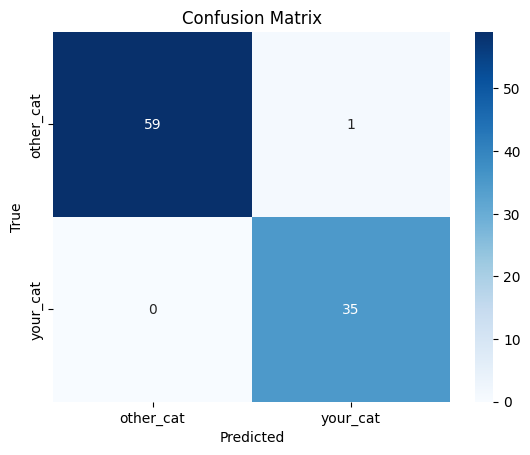

In [20]:
# Test transforms
test_transform = transforms.Compose([
    transforms.Lambda(manipulate_image),
    transforms.ToTensor(),
    transforms.Resize((image_size, image_size)),
])

# Prepare test data
test_images = your_cat_test + other_cat_test
test_labels = [1] * len(your_cat_test) + [0] * len(other_cat_test)
test_dataset = CatDataset(test_images, test_labels, transform=test_transform)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load model for evaluation
model = efficientnet_b0(weights=EfficientNet_B0_Weights.IMAGENET1K_V1)
num_ftrs = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_ftrs, 2)
model.load_state_dict(torch.load("wheresmytabby_EfficientNet_ep8_lr001.pth"))
model = model.to(device)
model.eval()

# Calculate accuracy
true_labels = []
pred_labels = []
with torch.no_grad():
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        true_labels.extend(labels.cpu().numpy())
        pred_labels.extend(predicted.cpu().numpy())

accuracy = 100 * sum(t == p for t, p in zip(true_labels, pred_labels)) / len(true_labels)
print(f"Test Accuracy: {accuracy}%")

# Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['other_cat', 'your_cat'], yticklabels=['other_cat', 'your_cat'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Visualise results with samples - EfficientNet 7 epochs

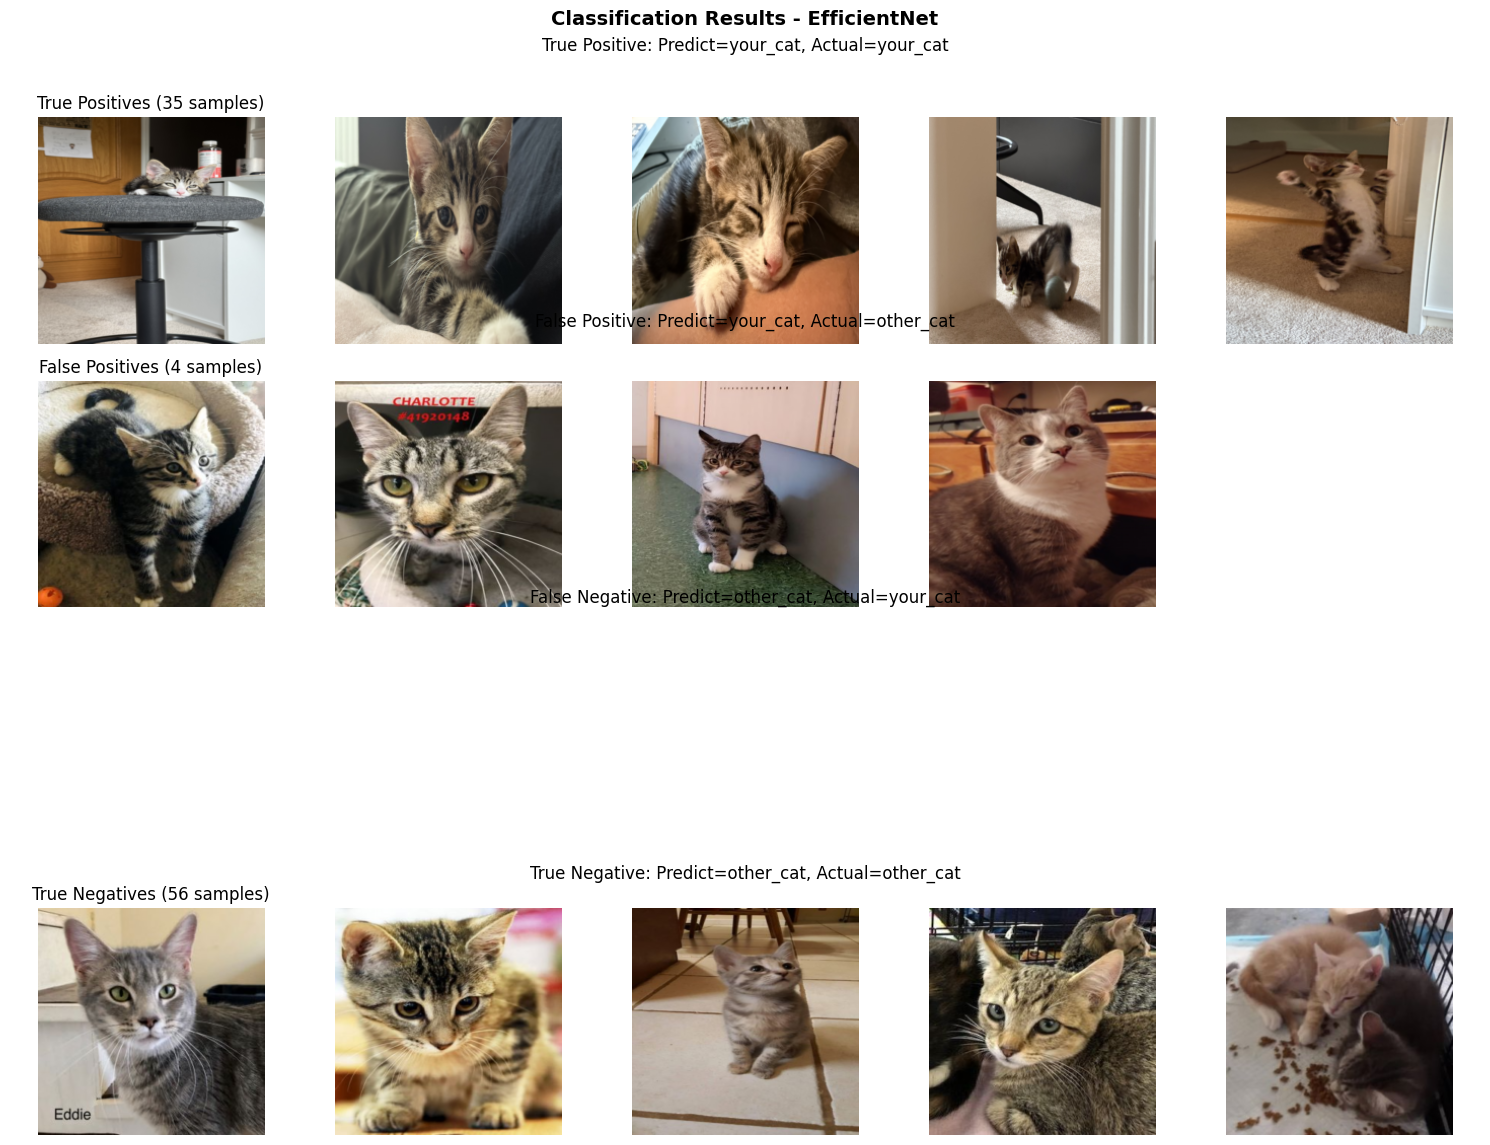

In [23]:
# Display examples
fig = plt.figure(figsize=(15, 12))
plt.suptitle("Classification Results - EfficientNet", fontsize=14, fontweight='bold')

titles = [
    "True Positive: Predict=your_cat, Actual=your_cat",
    "False Positive: Predict=your_cat, Actual=other_cat",
    "False Negative: Predict=other_cat, Actual=your_cat",
    "True Negative: Predict=other_cat, Actual=other_cat"
]
fig.text(0.5, 0.95, titles[0], ha='center', va='center', fontsize=12)  # Top row
fig.text(0.5, 0.72, titles[1], ha='center', va='center', fontsize=12)  # 2nd row
fig.text(0.5, 0.49, titles[2], ha='center', va='center', fontsize=12)  # 3rd row
fig.text(0.5, 0.26, titles[3], ha='center', va='center', fontsize=12)  # 4th row

# Helper function to get all samples (up to 5, duplicates if less than 5)
def get_samples(indices, total, max_samples=5):
    if total == 0:
        return []
    return np.random.choice(indices, min(max_samples, total), replace=False)

# Row 1: True Positives
tp_count = len(true_positives)
tp_indices = get_samples(range(tp_count), tp_count)
for i, idx in enumerate(tp_indices):
    img, _, _ = true_positives[idx]
    img = img.numpy().transpose((1, 2, 0))
    img = np.clip(img, 0, 1)  # Avoid clipping warning
    plt.subplot(4, 5, i + 1)
    plt.imshow(img)
    plt.axis("off")
    if i == 0:
        plt.title(f"True Positives ({tp_count} samples)")

# Row 2: False Positives
fp_count = len(false_positives)
fp_indices = get_samples(range(fp_count), fp_count)
for i, idx in enumerate(fp_indices):
    img, _, _ = false_positives[idx]
    img = img.numpy().transpose((1, 2, 0))
    img = np.clip(img, 0, 1)
    plt.subplot(4, 5, i + 6)
    plt.imshow(img)
    plt.axis("off")
    if i == 0:
        plt.title(f"False Positives ({fp_count} samples)")

# Row 3: False Negatives
fn_count = len(false_negatives)
fn_indices = get_samples(range(fn_count), fn_count)
for i, idx in enumerate(fn_indices):
    img, _, _ = false_negatives[idx]
    img = img.numpy().transpose((1, 2, 0))
    img = np.clip(img, 0, 1)
    plt.subplot(4, 5, i + 11)
    plt.imshow(img)
    plt.axis("off")
    if i == 0:
        plt.title(f"False Negatives ({fn_count} samples)")

# Row 4: True Negatives
tn_count = len(true_negatives)
tn_indices = get_samples(range(tn_count), tn_count)
for i, idx in enumerate(tn_indices):
    img, _, _ = true_negatives[idx]
    img = img.numpy().transpose((1, 2, 0))
    img = np.clip(img, 0, 1)
    plt.subplot(4, 5, i + 16)
    plt.imshow(img)
    plt.axis("off")
    if i == 0:
        plt.title(f"True Negatives ({tn_count} samples)")

# Fill remaining subplots with empty space if fewer than 5 samples
for i in range(len(tp_indices), 5):
    plt.subplot(4, 5, i + 1)
    plt.axis("off")
for i in range(len(fp_indices), 5):
    plt.subplot(4, 5, i + 6)
    plt.axis("off")
for i in range(len(fn_indices), 5):
    plt.subplot(4, 5, i + 11)
    plt.axis("off")
for i in range(len(tn_indices), 5):
    plt.subplot(4, 5, i + 16)
    plt.axis("off")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjusted rect for title spacing
plt.show()

## Try efficientnet b1, image size 240, learning rate 0.0005

In [40]:
from torchvision.models import efficientnet_b1, EfficientNet_B1_Weights

# Hyperparameters
cnn_epoch_count = 8
image_size = 240
learning_rate = 0.0005

# Custom Dataset
class CatDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels  # 1 for your_cat, 0 for other_cat
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        if self.transform:
            image = self.transform(image)
        return image, self.labels[idx]

# Define transforms for training
train_transform = transforms.Compose([
    transforms.Lambda(manipulate_image),  # Apply your manipulate function
    transforms.ToTensor(),
    transforms.Resize((image_size, image_size)),
    transforms.RandomRotation(360),
    transforms.RandomResizedCrop(image_size, scale=(0.7, 1.0)),
])

# Prepare training data
your_cat_labels = [1] * len(your_cat_train)
other_cat_labels = [0] * len(other_cat_train)
train_images = your_cat_train + other_cat_train
train_labels = your_cat_labels + other_cat_labels
train_dataset = CatDataset(train_images, train_labels, transform=train_transform)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Device
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

# EfficientNet-B0 Model
model = efficientnet_b1(weights=EfficientNet_B1_Weights.IMAGENET1K_V1)
num_ftrs = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_ftrs, 2)  # 2 classes
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(cnn_epoch_count):
    running_loss = 0.0
    for images, labels in train_dataloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1} loss: {running_loss/len(train_dataloader)}")

# Save model
torch.save(model.state_dict(), "wheresmytabby_efficientnetb1_lr0005.pth")


Using device: mps
Epoch 1 loss: 0.3721077696730693
Epoch 2 loss: 0.08163026355517407
Epoch 3 loss: 0.033894650308260076
Epoch 4 loss: 0.025069616579761107
Epoch 5 loss: 0.06008784985169768
Epoch 6 loss: 0.03142511301363508
Epoch 7 loss: 0.030129444028716534
Epoch 8 loss: 0.020019551603278767


Test Accuracy: 98.94736842105263%


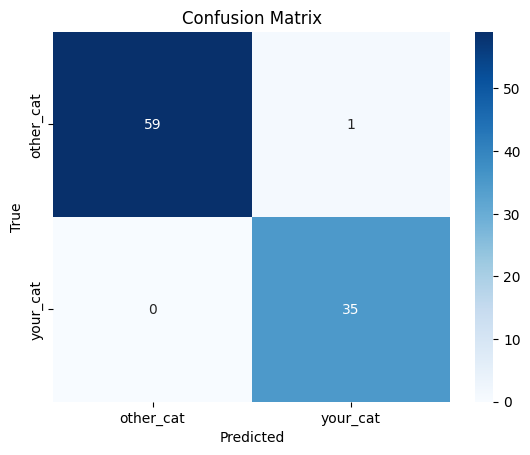

In [41]:
# Test transforms
test_transform = transforms.Compose([
    transforms.Lambda(manipulate_image),
    transforms.ToTensor(),
    transforms.Resize((image_size, image_size)),
])

# Prepare test data
test_images = your_cat_test + other_cat_test
test_labels = [1] * len(your_cat_test) + [0] * len(other_cat_test)
test_dataset = CatDataset(test_images, test_labels, transform=test_transform)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load model for evaluation
model = efficientnet_b1(weights=EfficientNet_B1_Weights.IMAGENET1K_V1)
num_ftrs = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_ftrs, 2)
model.load_state_dict(torch.load("wheresmytabby_efficientnetb1_lr0005.pth"))
model = model.to(device)
model.eval()

# Calculate accuracy
true_labels = []
pred_labels = []
with torch.no_grad():
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        true_labels.extend(labels.cpu().numpy())
        pred_labels.extend(predicted.cpu().numpy())

accuracy = 100 * sum(t == p for t, p in zip(true_labels, pred_labels)) / len(true_labels)
print(f"Test Accuracy: {accuracy}%")

# Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['other_cat', 'your_cat'], yticklabels=['other_cat', 'your_cat'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()